In [1]:
print("hello world")

hello world


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv("tips.csv")

In [37]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape()

TypeError: 'tuple' object is not callable

In [38]:
df.shape

(244, 7)

In [39]:
df['size'].unique

<bound method Series.unique of 0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64>

In [40]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(1)

In [42]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [63]:
df['tip_pct']=round(df['tip']/df['total_bill']*100,2)
df['bill_per_head']=round(df['total_bill']/df['size'],2)
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct,bill_per_head
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,6.15
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39,9.68
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36,13.59
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82,11.34
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82,8.91


<Axes: xlabel='sex'>

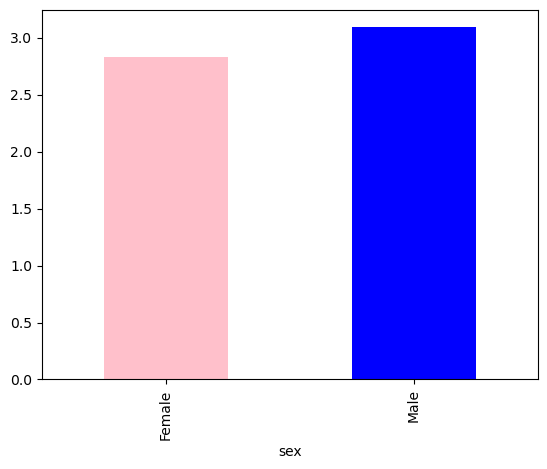

In [66]:
average_tip_by_gender=df.groupby('sex')['tip'].mean()
average_tip_by_gender.plot(kind='bar', color=['pink', 'blue'])

<Axes: xlabel='smoker'>

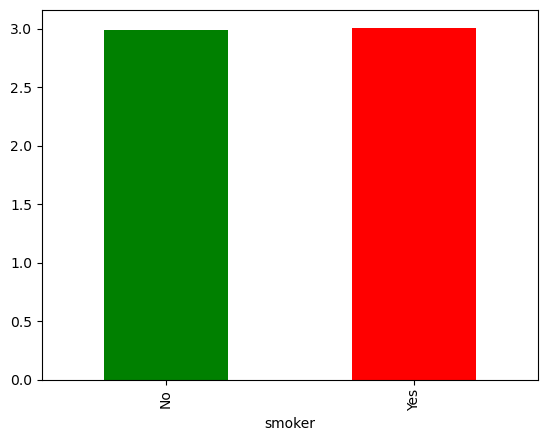

In [67]:
tip_by_smoker=df.groupby('smoker')['tip'].mean()
tip_by_smoker.plot(kind='bar', color=['green', 'red'])

<Axes: xlabel='size'>

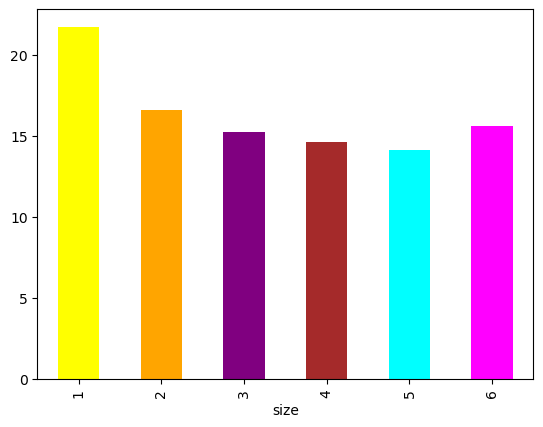

In [70]:
tip_by_group_size=df.groupby('size')['tip_pct'].mean()
tip_by_group_size.plot(kind='bar', color=['yellow', 'orange', 'purple', 'brown', 'cyan', 'magenta'])

<Axes: xlabel='day'>

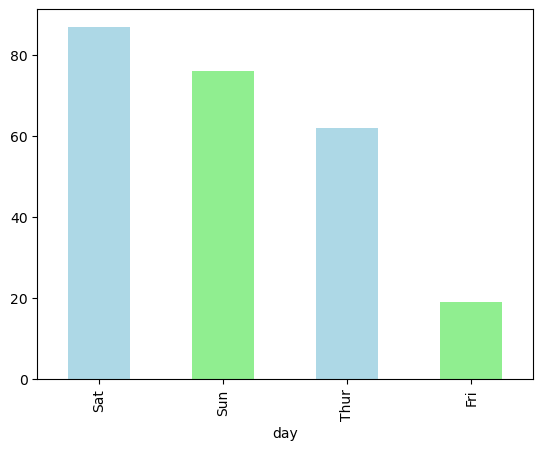

In [71]:
df['day'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen'])

<Axes: xlabel='time'>

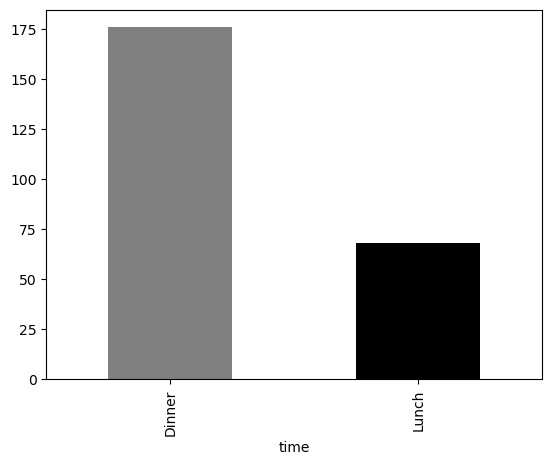

In [75]:
df['time'].value_counts().plot(kind='bar',color=['grey', 'black'])

In [80]:
df.pivot_table(index='day', columns='time', values='total_bill', aggfunc='mean')

time,Dinner,Lunch
day,,
Fri,19.663333,12.845714
Sat,20.441379,NaN
Sun,21.410000,NaN
Thur,18.780000,17.664754


In [81]:
df.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')

time,Dinner,Lunch
day,,
Fri,15.892500,18.875714
Sat,15.314598,NaN
Sun,16.689605,NaN
Thur,15.970000,16.129016


In [82]:
df.pivot_table(index='day', columns='time', values='size', aggfunc='mean')

time,Dinner,Lunch
day,,
Fri,2.166667,2.000000
Sat,2.517241,NaN
Sun,2.842105,NaN
Thur,2.000000,2.459016


In [86]:
df.pivot_table(index='day', columns='smoker', values="total_bill" ,aggfunc='count')

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


<Axes: ylabel='Density'>

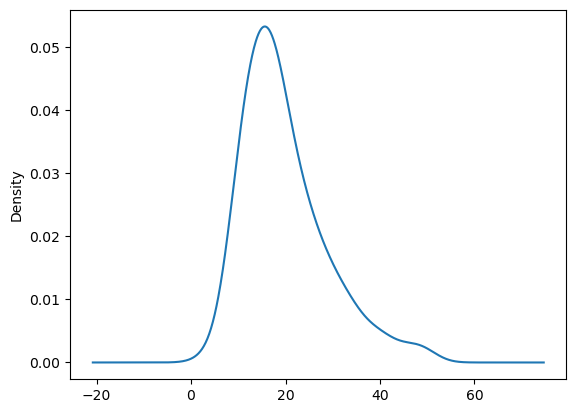

In [93]:
df['total_bill'].plot(kind='kde')

<Axes: ylabel='Density'>

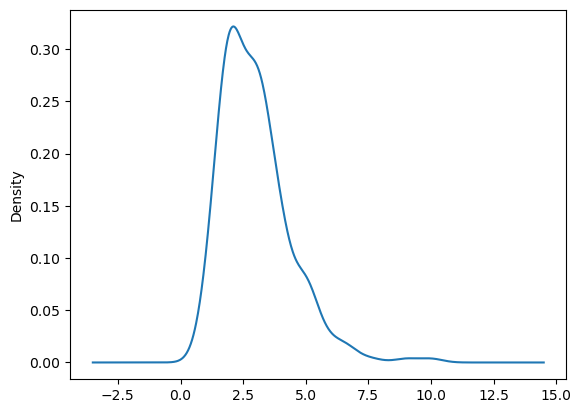

In [88]:
df['tip'].plot(kind='kde')

In [100]:
numerical_cols = df[['total_bill','tip','size','tip_pct']]
numerical_cols.corr()

,total_bill,tip,size,tip_pct
total_bill,1.000000,0.675734,0.598315,-0.338629
tip,0.675734,1.000000,0.489299,0.342361
size,0.598315,0.489299,1.000000,-0.142844
tip_pct,-0.338629,0.342361,-0.142844,1.000000
